In [1]:
import sys
sys.path.append('../ml_utils')

import config as cfg
import timeit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)
%matplotlib inline

In [2]:
# Don't execute!!!
#from IPython.display import display, HTML

#CSS = """
#.output {
#    flex-direction: row;
#}
#"""

# HTML('<style>{}</style>'.format(CSS))

In [3]:
# Don't execute!!!
#from IPython.display import display_html

#def display_side_by_side(*args):
#    html_str=''
#    for df in args:
#        html_str+=df.to_html()
#    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [4]:
def print_counts(axis, rotation=45, inverse=False):
    
    if inverse:
        # set individual bar lables using above list
        for i in axis.patches:
            # get_width pulls left or right; get_y pushes up or down
            axis.text(i.get_width()+.1, i.get_y()+.31, \
                    str(round((i.get_width()), 2)), fontsize=15, color='dimgrey')
    else:
        if rotation <= 0:
            # set individual bar lables using above list        
            for i in axis.patches:
                # get_x pulls left or right; get_height pushes up or down
                axis.text(i.get_x()-.03, i.get_height()+.5, \
                        str(round(i.get_height(), 2)), fontsize=12, color='dimgrey')
        else:
            for i in axis.patches:
                # get_x pulls left or right; get_height pushes up or down
                axis.text(i.get_x()+.04, i.get_height()+12000, \
                        str(round((i.get_height()), 2)), fontsize=11, color='dimgrey',
                            rotation=rotation)

In [5]:
def plot_barh_inverse(df, col_name, width, height, top=None, counts=True):
    
    if top:
        ax = df[col_name].value_counts()[:top].plot(kind='barh', figsize=(width,height), fontsize=17)
    else:
        ax = df[col_name].value_counts().plot(kind='barh', figsize=(width,height), fontsize=17)
    
    ax.set_alpha(0.8)
    ax.set_title(col_name, fontsize=18, fontweight="bold")
    # ax.set_xlabel("Count", fontsize=18);
    # ax.set_xticks([0, 5])

    if counts:
        print_counts(ax, 0, True)
        
    # invert for largest on top 
    ax.invert_yaxis()

In [6]:
def plot_barh_inverse_2(df, df2, col_name, width, height, top=None, counts=True):
    
    comp = pd.DataFrame()
    
    if top:
        comp['normal'] = df2[col_name].value_counts()[:top]
        comp['all'] = df[col_name].value_counts()[:top]
    else:
        comp['normal'] = df2[col_name].value_counts()
        comp['all'] = df[col_name].value_counts()
    
    ax = comp.plot(kind='barh', stacked=False, alpha=1.0, figsize=(width,height), fontsize=17)
    
    ax.set_alpha(0.8)
    ax.set_title(col_name, fontsize=18, fontweight="bold")
    # ax.set_xlabel("Count", fontsize=18);
    # ax.set_xticks([0, 5])
    patches, labels = ax.get_legend_handles_labels()
    ax.legend(patches, labels, loc='lower right')

    if counts:
        print_counts(ax, 0, True)

    # invert for largest on top 
    ax.invert_yaxis()

In [7]:
def plot_bar(df, col_name, width, height, sort=False, counts=True, c_rotation=45, x_rotation=0):
    
    data = None
    
    if sort:
        data = df[col_name].value_counts().sort_index()
    else:
        data = df[col_name].value_counts()
        
    ax = data.plot(kind='bar', figsize=(width,height), fontsize=17)
        
    ax.set_alpha(0.8)
    ax.set_title(col_name, fontsize=15, fontweight="bold")
    # ax.set_xlabel("Count", fontsize=18);
    # ax.set_xticks([0, 5])
    ax.set_xticklabels(data.index.values, rotation=x_rotation, fontsize=13)
        
    if counts:
        print_counts(ax, c_rotation)

In [8]:
def plot_bar_2(df, df2, col_name, width, height, sort = False, counts = True, c_rotation=45, x_rotation=0):
    
    data = pd.DataFrame()
    
    if sort:
        data['normal'] = df2[col_name].value_counts().sort_index()
        data['all'] = df[col_name].value_counts().sort_index()
    else:
        data['normal'] = df2[col_name].value_counts()
        data['all'] = df[col_name].value_counts()
    
    ax = data.plot(kind='bar', stacked=False, alpha=1.0, figsize=(width,height), fontsize=17)
        
    ax.set_alpha(0.8)
    ax.set_title(col_name, fontsize=15, fontweight="bold")
    # ax.set_xlabel("Count", fontsize=18);
    # ax.set_xticks([0, 5])
    ax.set_xticklabels(data.index.values, rotation=x_rotation, fontsize=13)

    if counts:            
        print_counts(ax, c_rotation)

In [9]:
log_data = './../shared/data/swissid_authorize_logs_april_to_sept_2019.csv'

start = timeit.default_timer()
df = pd.read_csv(filepath_or_buffer=log_data, header=0, sep='\t', names=cfg.complete_feature_list, index_col=None)
stop = timeit.default_timer()

print("Original data frame size: {}\n".format(df.shape))
print("Time: {} seconds\n".format(stop - start))

Original data frame size: (12417597, 31)

Time: 59.89229571300001 seconds



In [10]:
print("data frame size: {}\n".format(df.shape))
#display(df)

data frame size: (12417597, 31)



In [11]:
res_df = df['label'].value_counts().to_frame()
display(res_df)

,label
suspect,7412813
normal,4982015
anomaly,22769


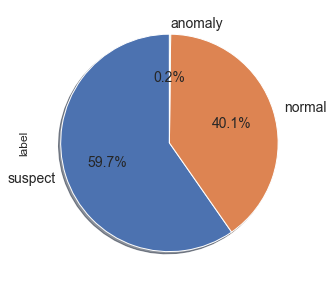

In [12]:
axis = res_df.plot(kind="pie", table=False, legend = False, fontsize=14,
              figsize=(5, 5), autopct='%1.1f%%', shadow=True, startangle=90, subplots=True)

In [13]:
normal = df[df["label"] == 'normal']
print("Normal data frame size: {}\n".format(normal.shape))

Normal data frame size: (4982015, 31)



In [14]:
anormal = df[df["label"] != 'normal']
print("Anormal data frame size: {}\n".format(anormal.shape))

Anormal data frame size: (7435582, 31)



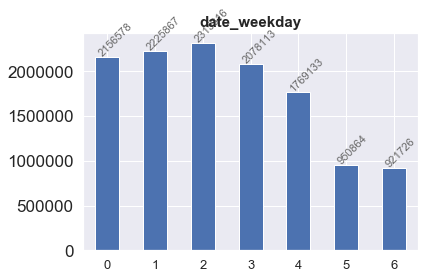

In [15]:
plot_bar(df, 'date_weekday', 6, 4, True)

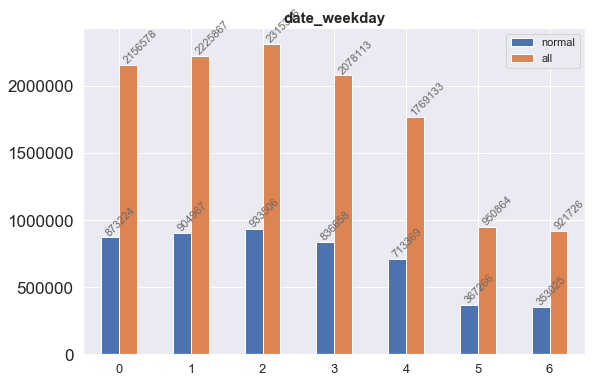

In [16]:
plot_bar_2(df, normal, 'date_weekday', 9, 6, True)

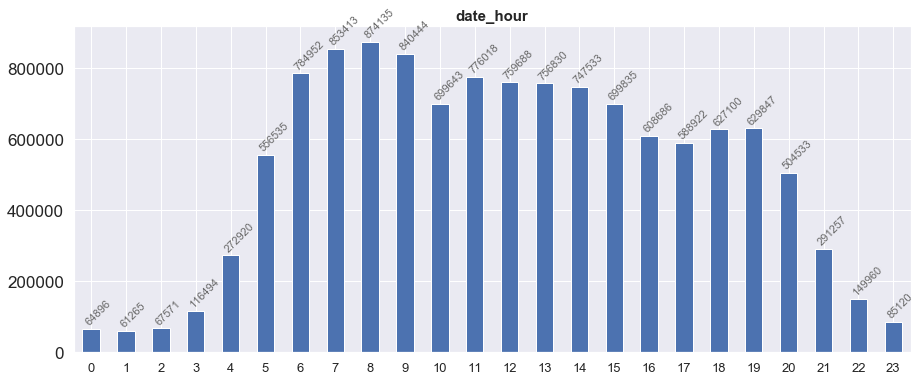

In [17]:
plot_bar(df, 'date_hour', 15, 6, True)

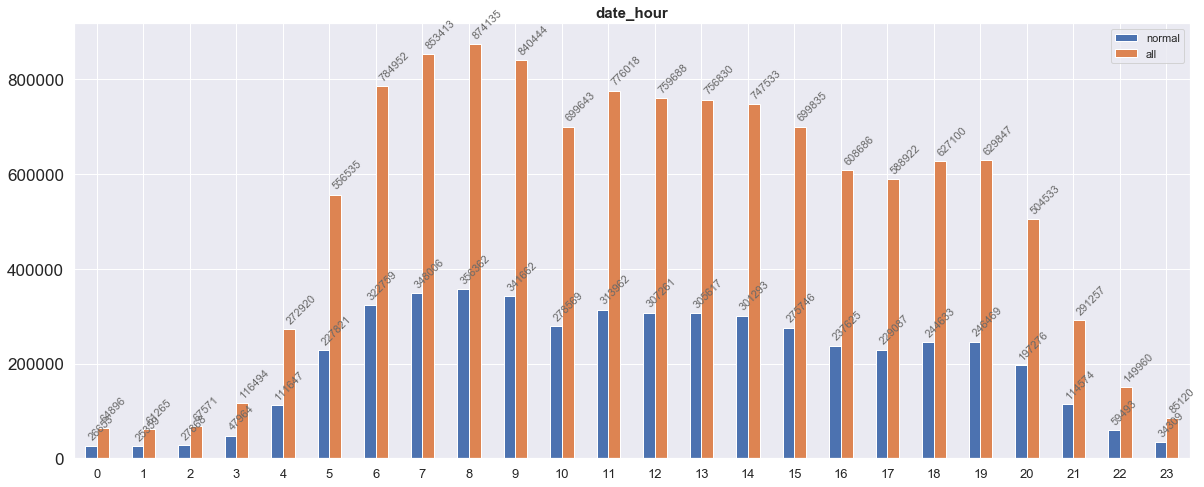

In [18]:
plot_bar_2(df, normal, 'date_hour', 20, 8, True)

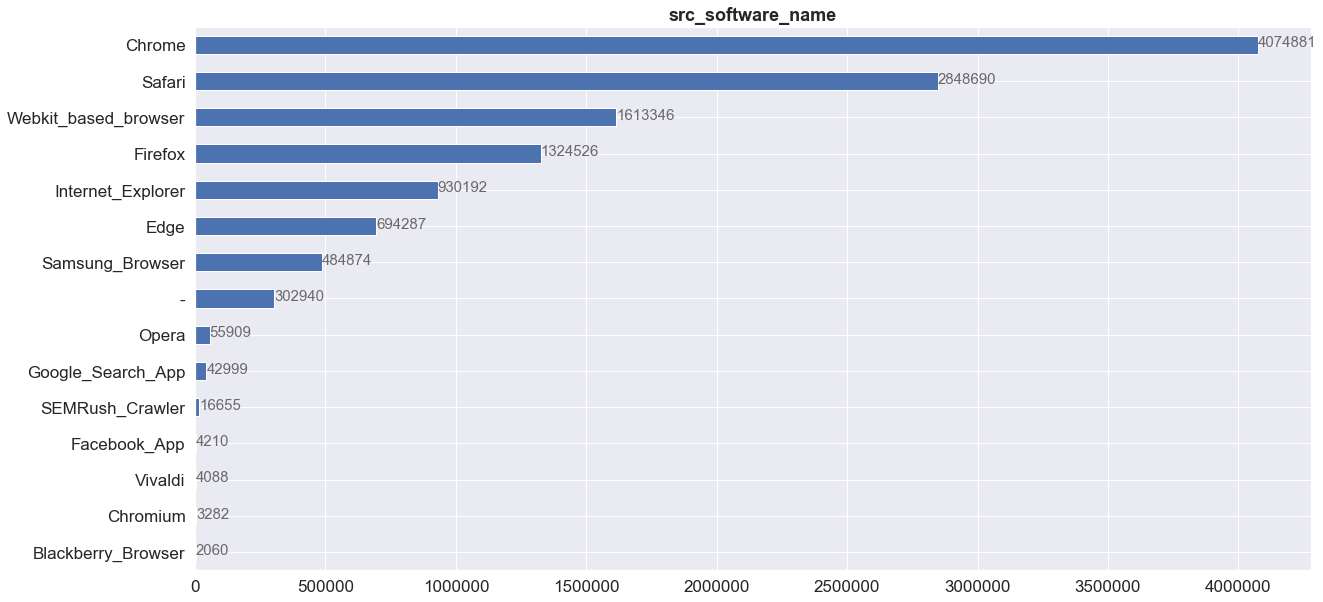

In [19]:
plot_barh_inverse(df, 'src_software_name', 20, 10, 15)

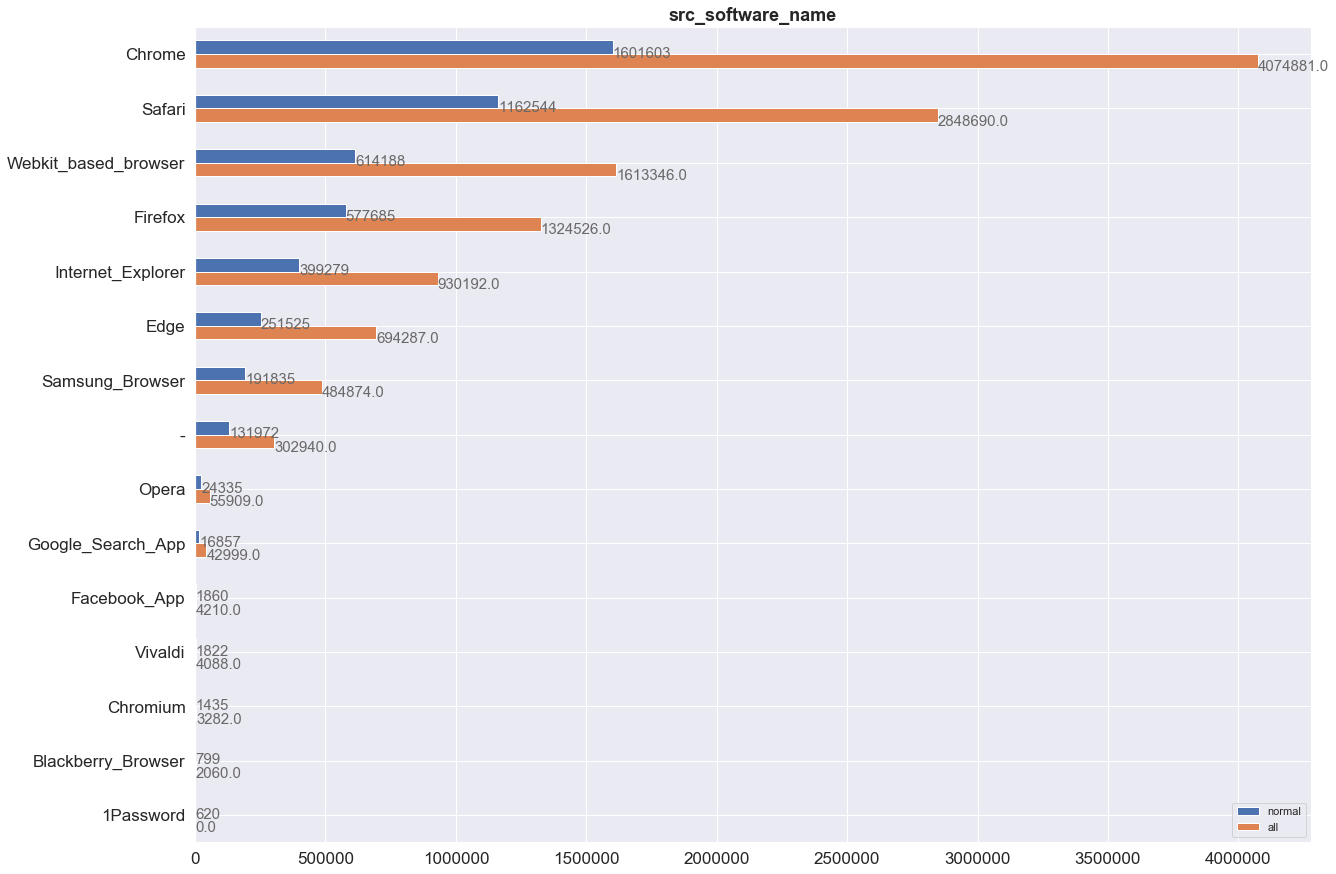

In [20]:
plot_barh_inverse_2(df, normal, 'src_software_name', 20, 15, 15)

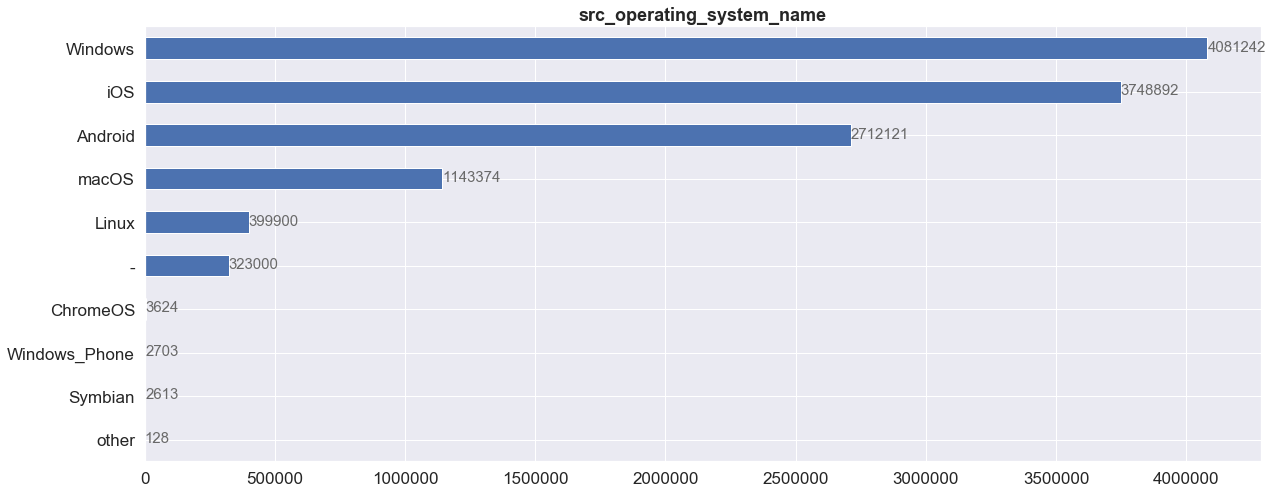

In [21]:
plot_barh_inverse(df, 'src_operating_system_name', 20, 8)

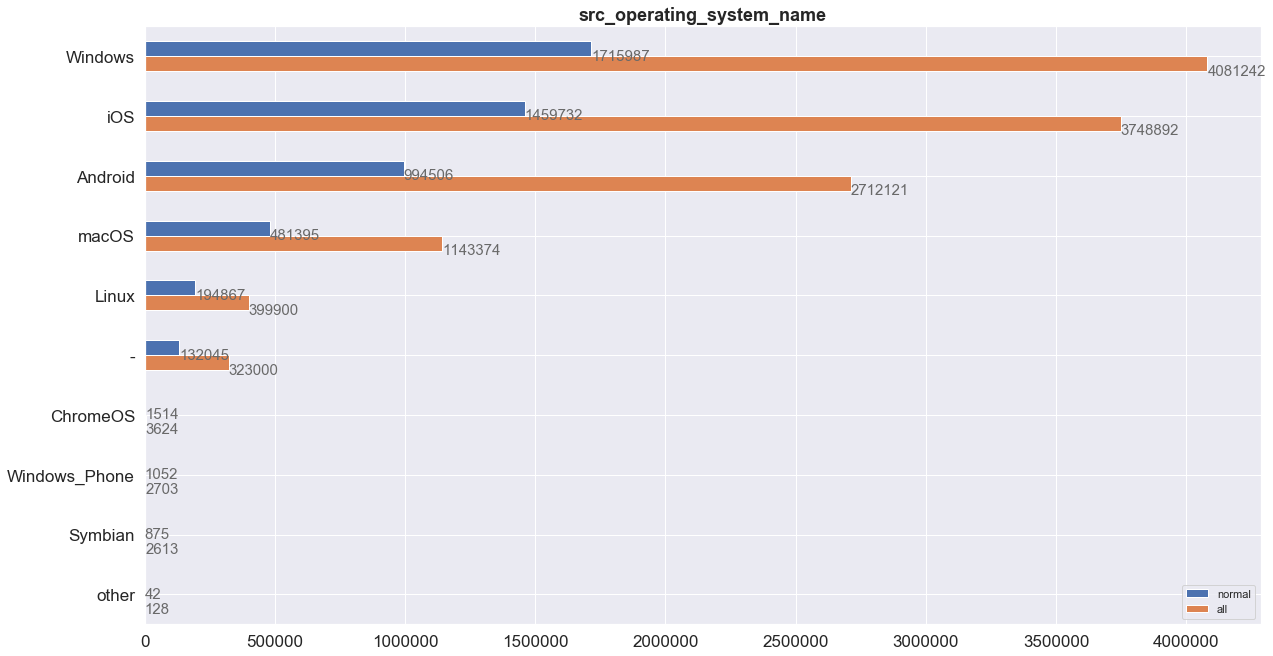

In [22]:
plot_barh_inverse_2(df, normal, 'src_operating_system_name', 20, 11)

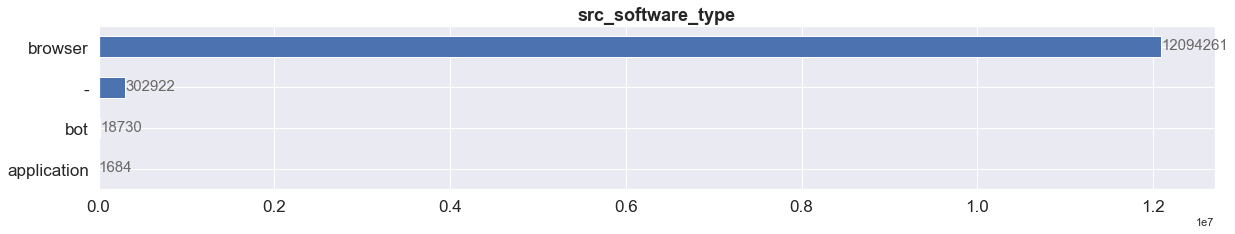

In [23]:
plot_barh_inverse(df, 'src_software_type', 20, 3)

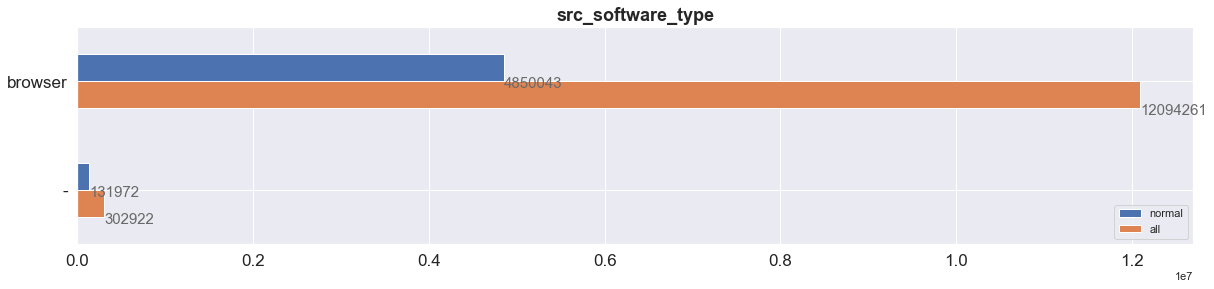

In [24]:
plot_barh_inverse_2(df, normal, 'src_software_type', 20, 4)

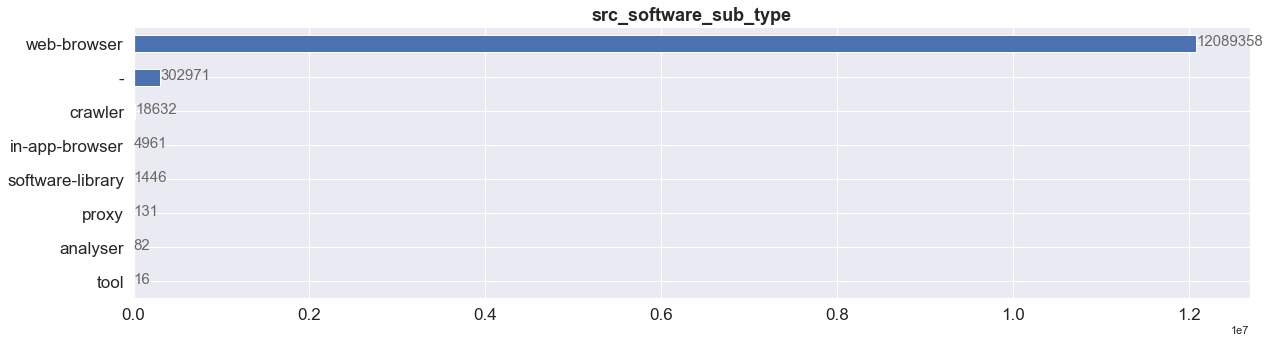

In [25]:
plot_barh_inverse(df, 'src_software_sub_type', 20, 5)

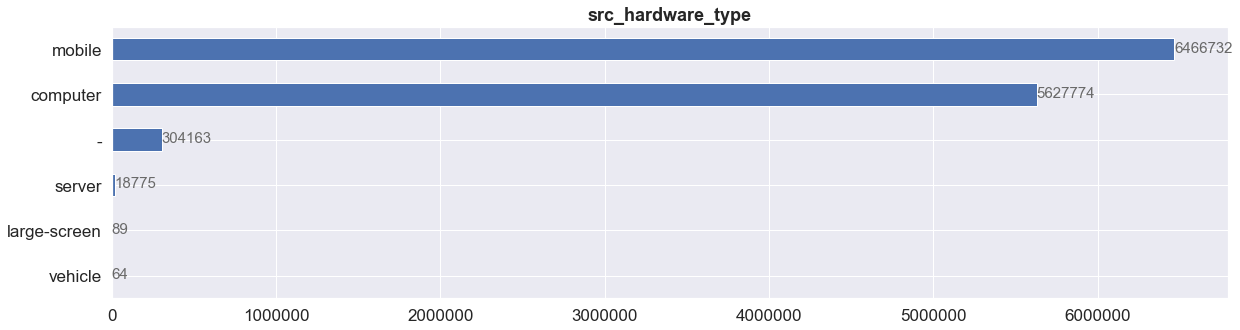

In [26]:
plot_barh_inverse(df, 'src_hardware_type', 20, 5)

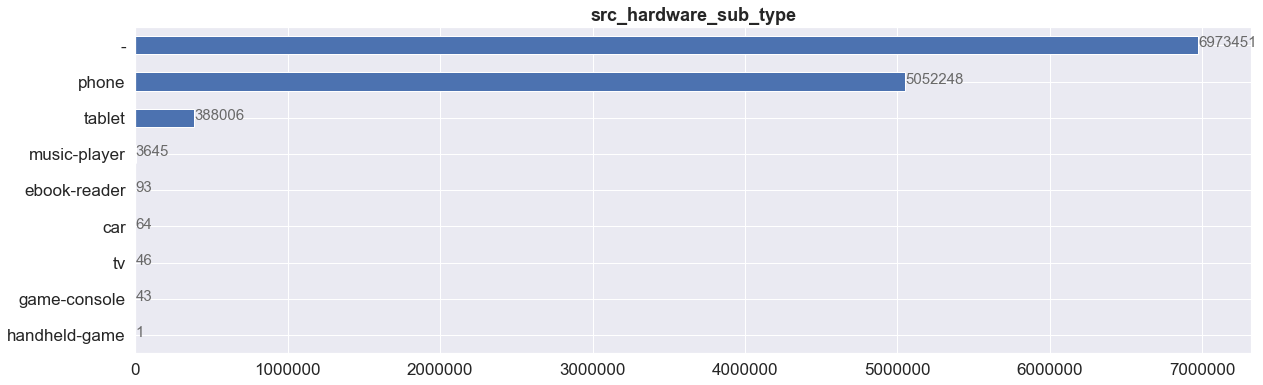

In [27]:
plot_barh_inverse(df, 'src_hardware_sub_type', 20, 6)

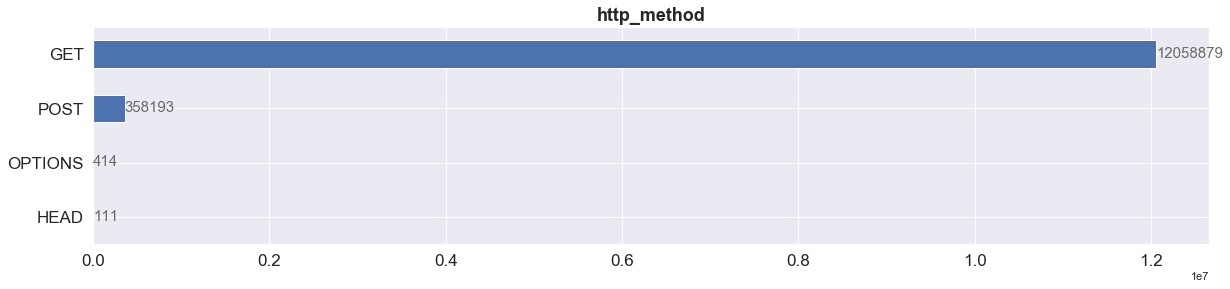

In [28]:
plot_barh_inverse(df, 'http_method', 20, 4)

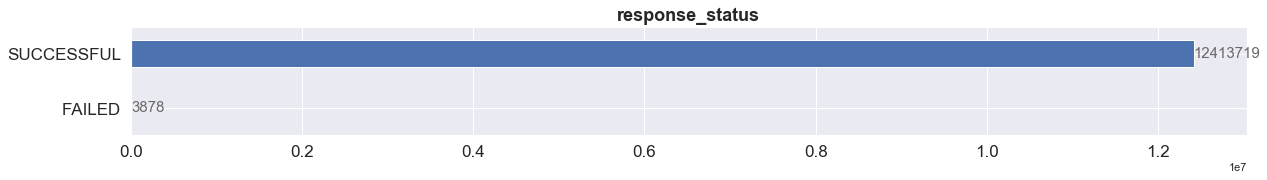

In [29]:
plot_barh_inverse(df, 'response_status', 20, 2)

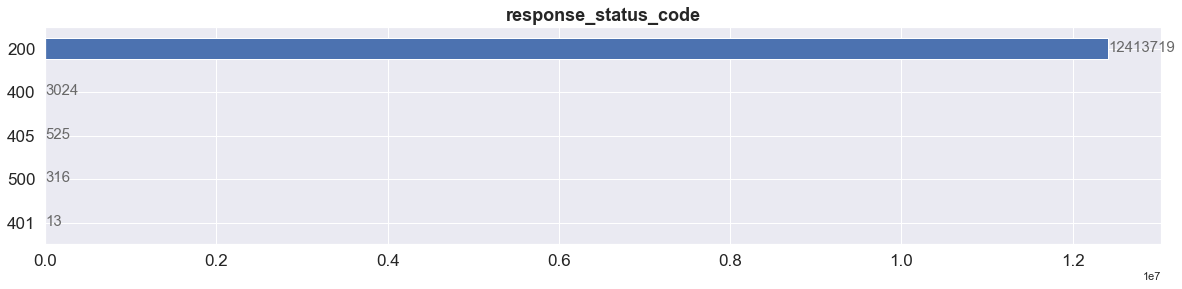

In [30]:
plot_barh_inverse(df, 'response_status_code', 20, 4)

In [31]:
res_df = df['response_time_ms']
res_df.describe()
#axis = res_df.plot(kind='hist', alpha=0.5)

count    1.241760e+07
mean     5.915851e+00
std      4.515585e+01
min      0.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      6.000000e+00
max      1.106800e+04
Name: response_time_ms, dtype: float64

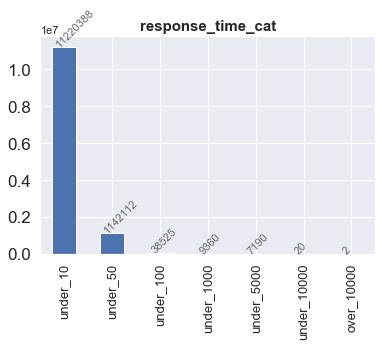

In [32]:
plot_bar(df, 'response_time_cat', 6, 4, False, x_rotation=90)

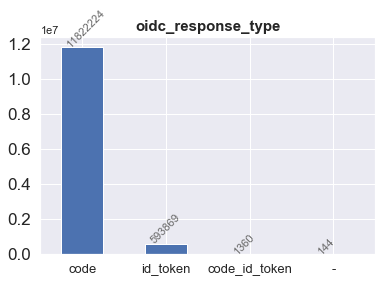

In [33]:
plot_bar(df, 'oidc_response_type', 6, 4, False)

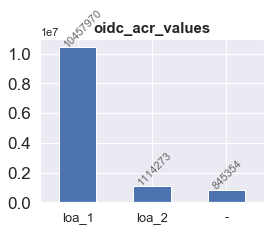

In [34]:
plot_bar(df, 'oidc_acr_values', 4, 3, False)

In [35]:
#plot_barh_inverse(df, 'oidc_client_id', 20, 30)

In [36]:
#plot_barh_inverse(df, 'client_name', 20, 15)

In [37]:
#plot_bar(df, 'client_type', 4, 4, False)

In [38]:
#plot_bar(df, 'ido_type', 5, 4, False)

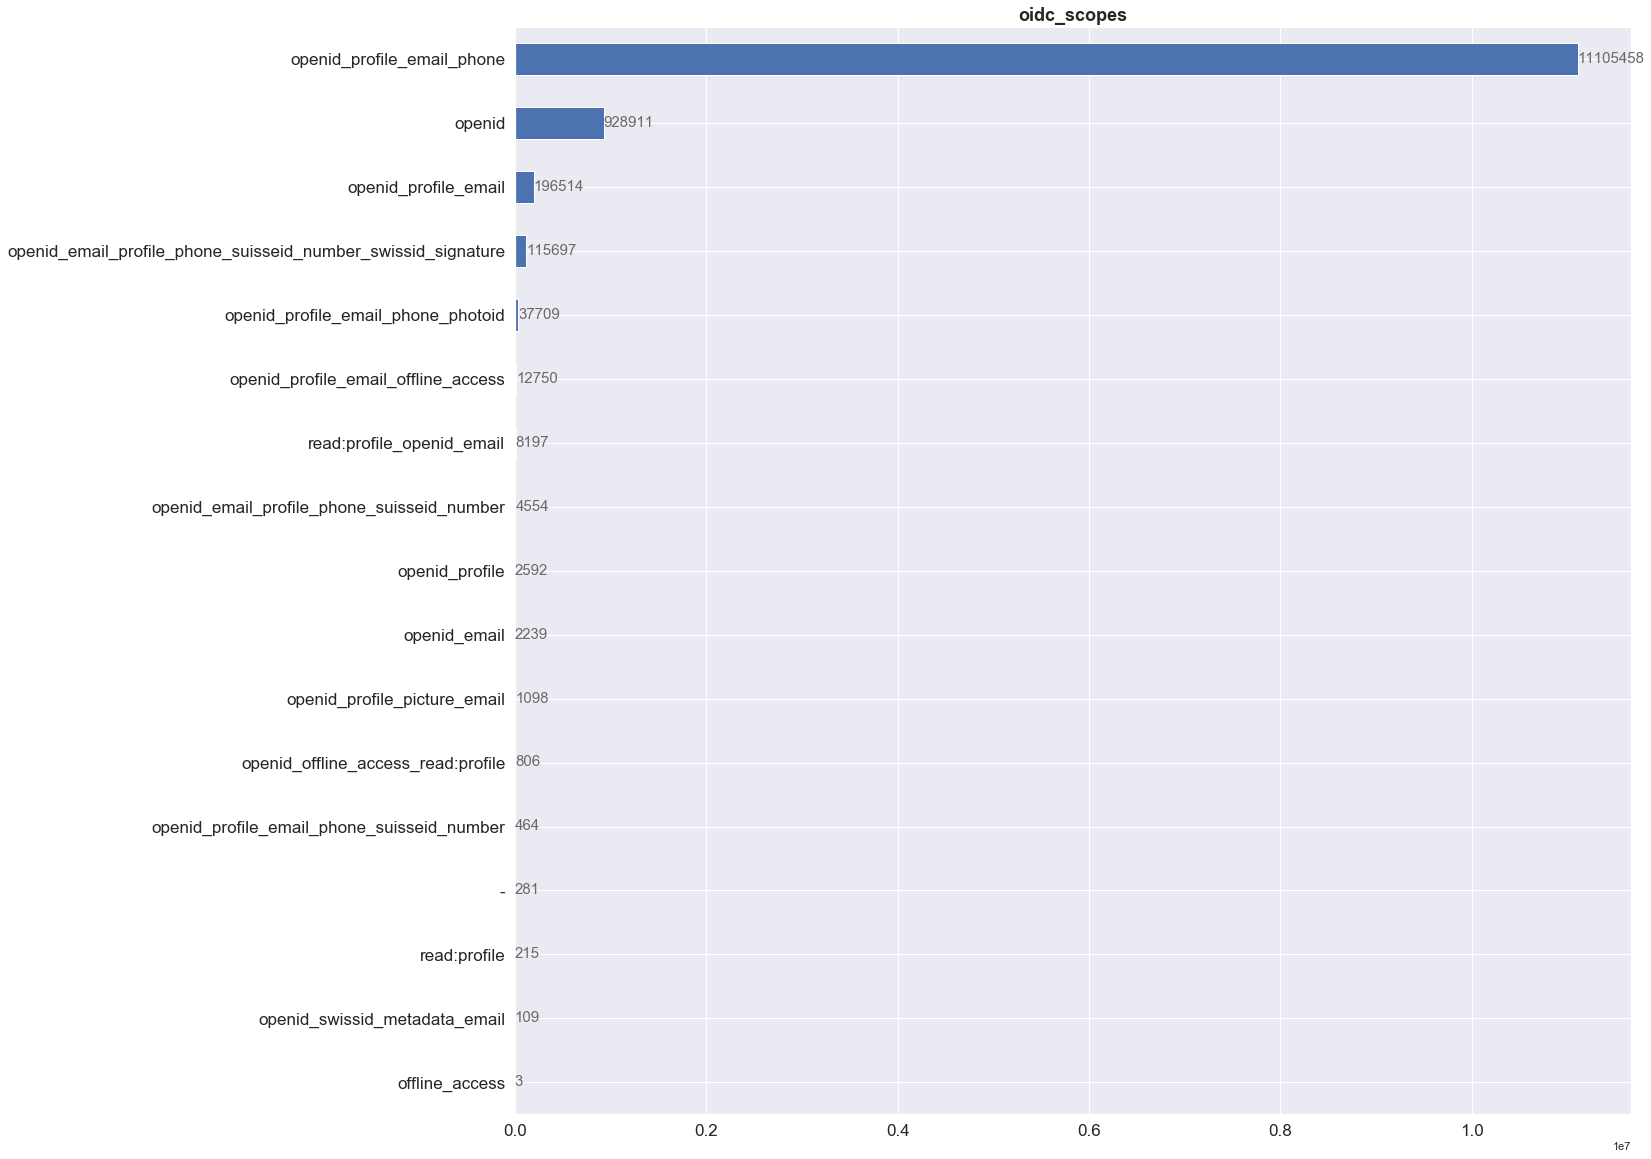

In [39]:
plot_barh_inverse(df, 'oidc_scopes', 20, 20)

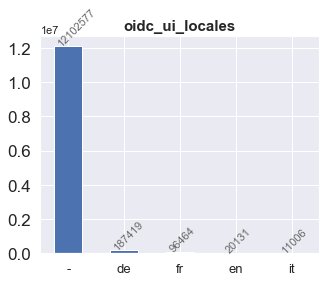

In [40]:
plot_bar(df, 'oidc_ui_locales', 5, 4, False)

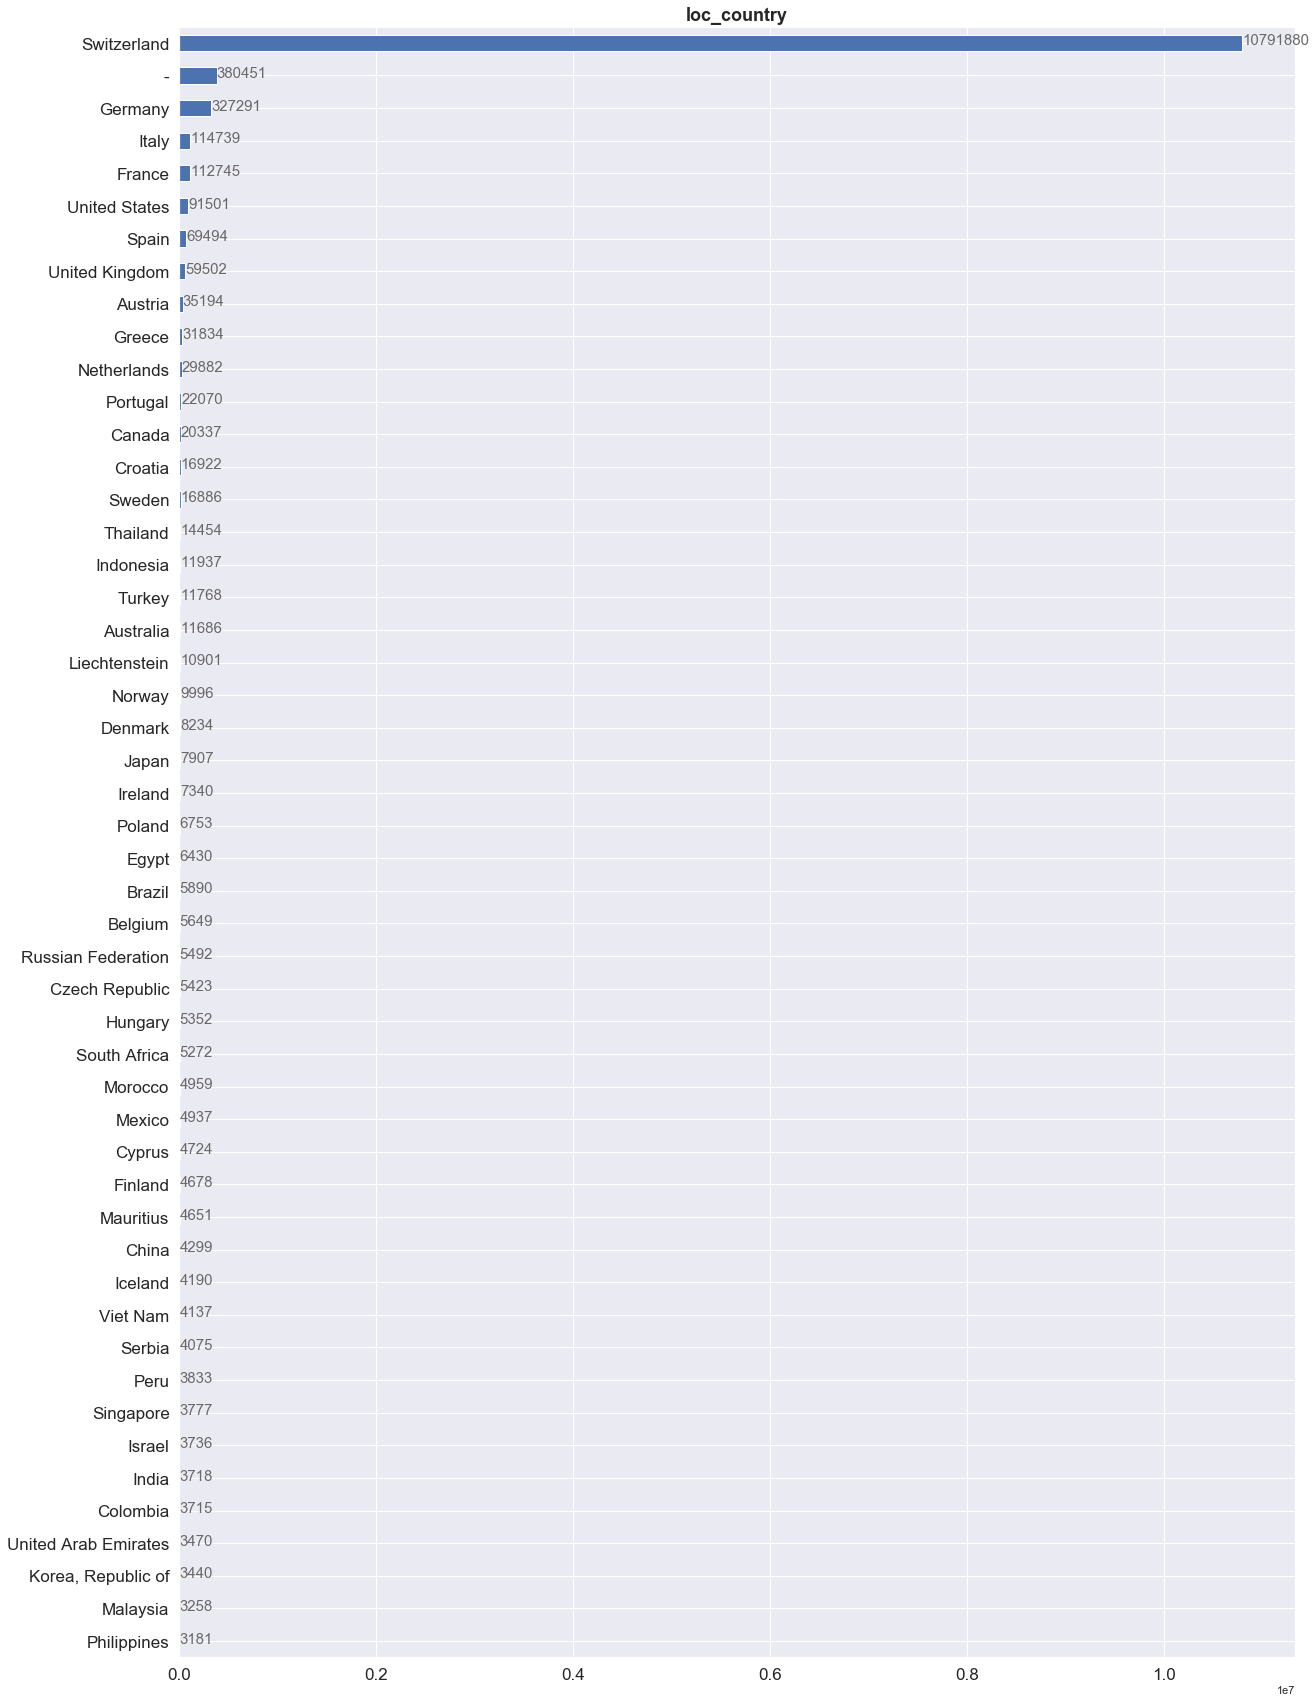

In [41]:
plot_barh_inverse(df, 'loc_country', 20, 30, 50)

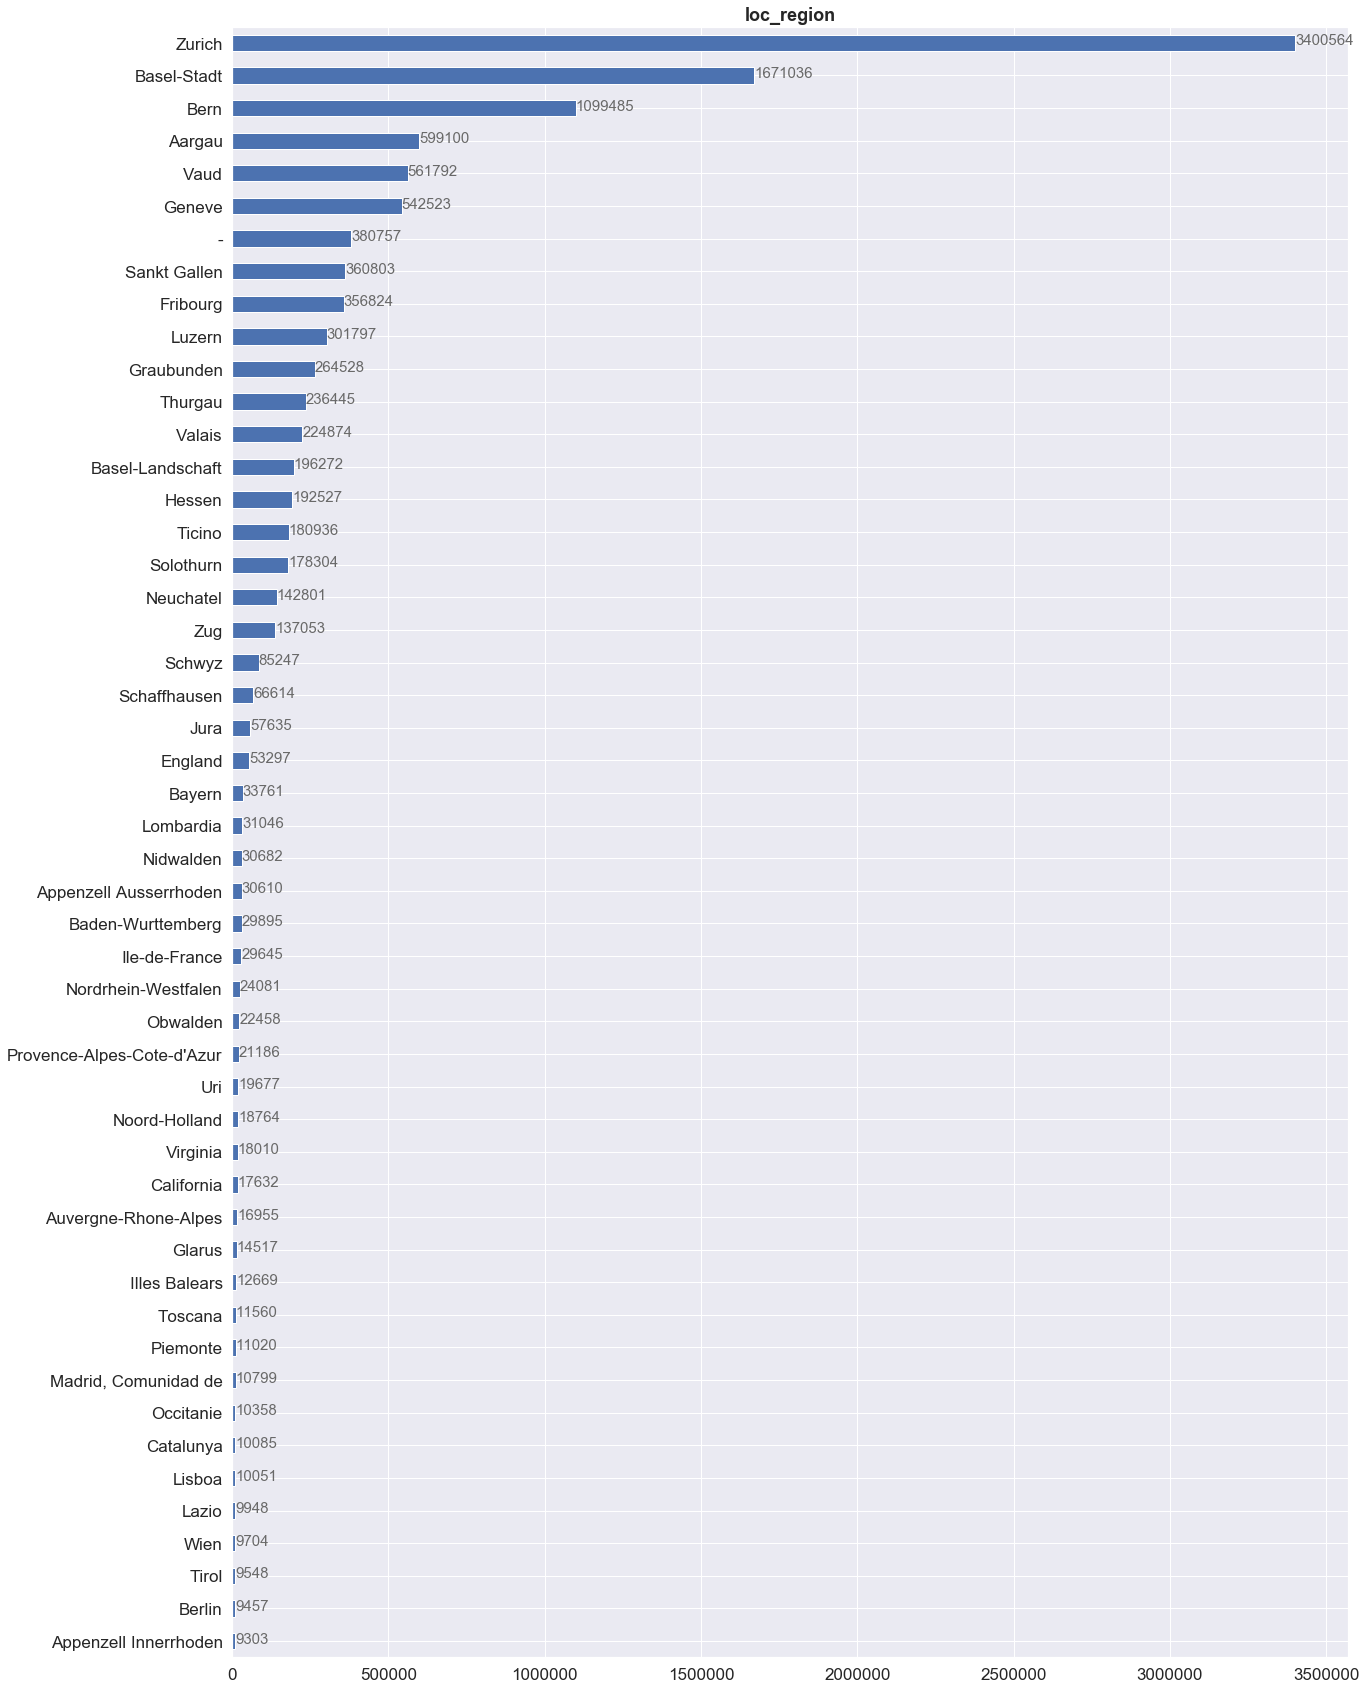

In [42]:
plot_barh_inverse(df, 'loc_region', 20, 30, 50)

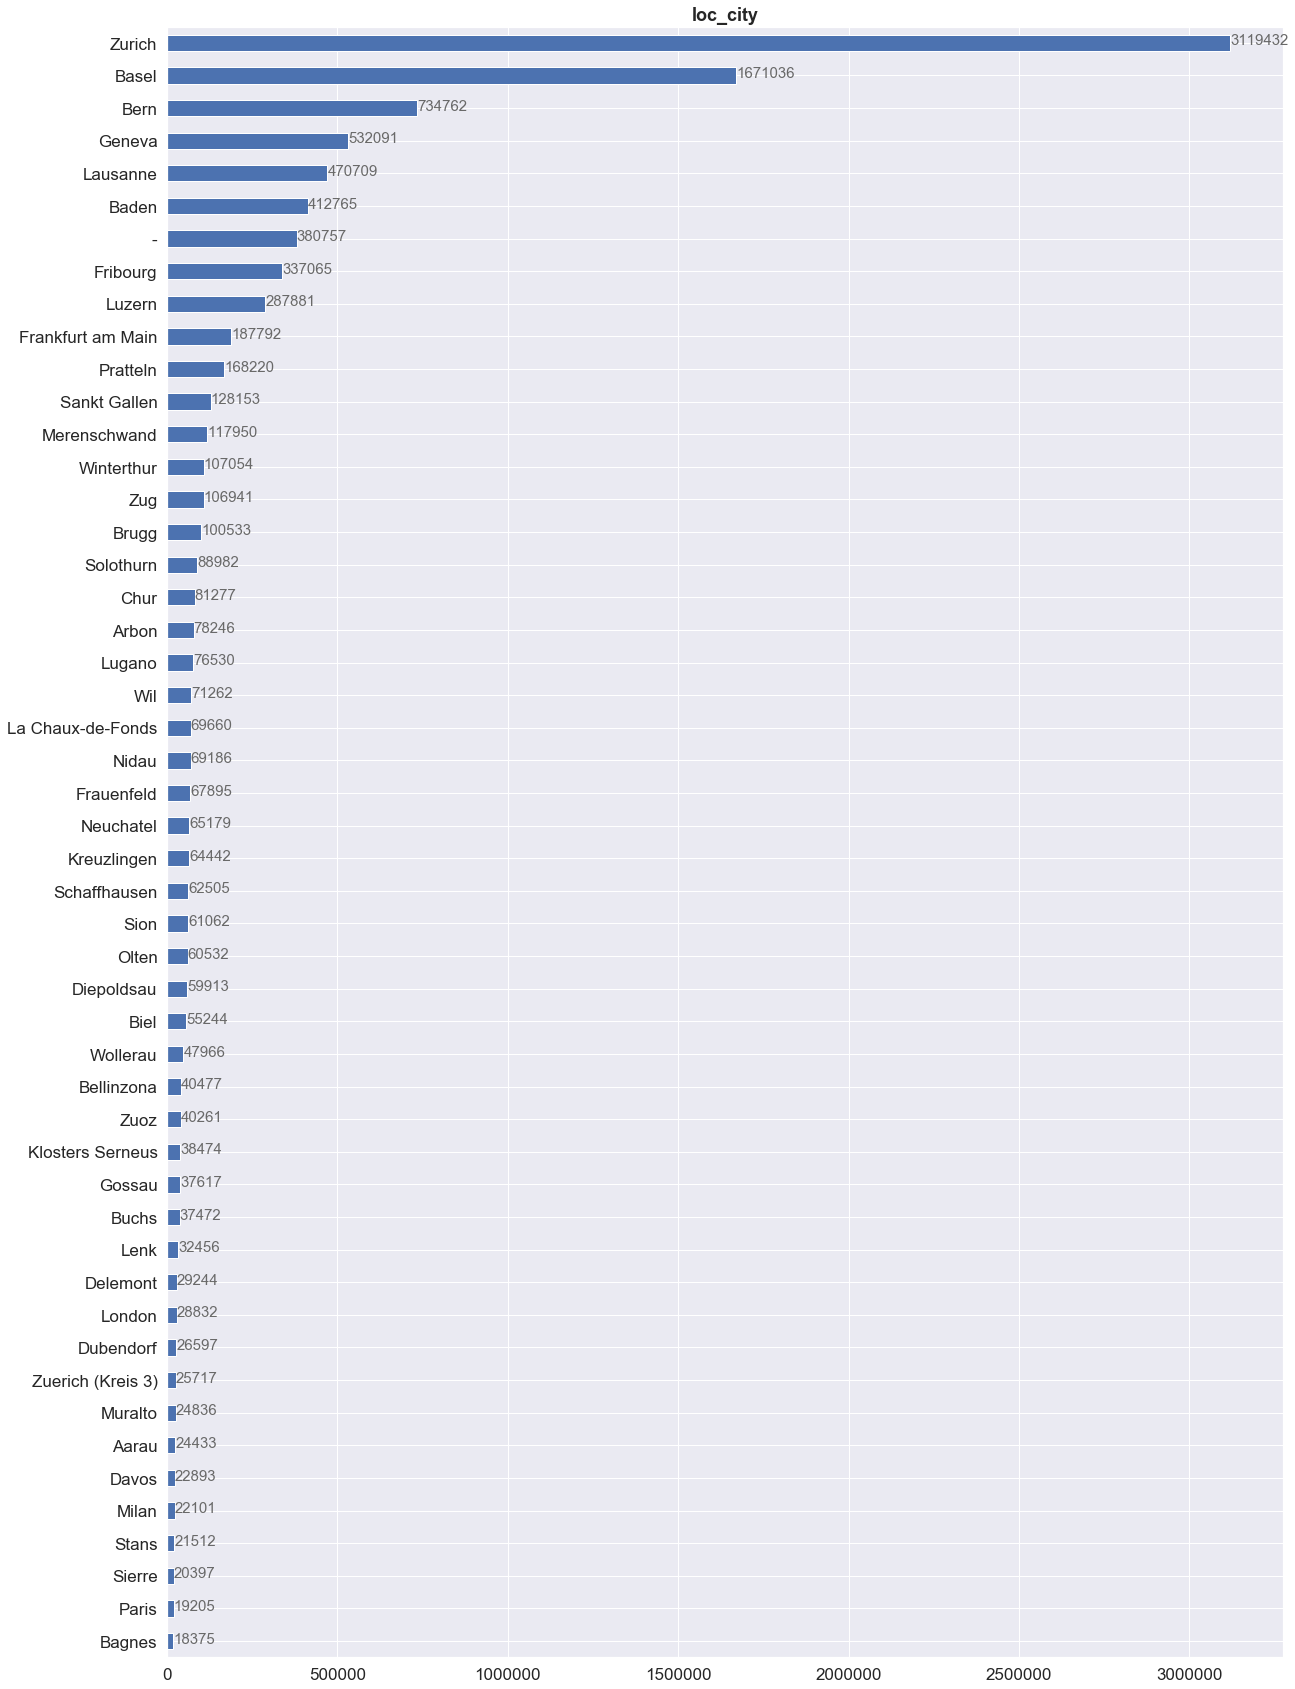

In [43]:
plot_barh_inverse(df, 'loc_city', 20, 30, 50)